## Step 1:Install dependencies Python


In [ ]:
# !pip install kenlm
# !pip install pyctcdecode

In [ ]:
# !pip install pydub

In [ ]:
!pip install jiwer soundfile gdown
#!pip install -U transformers
#!pip install torch

## Step 2: Import libraries

In [3]:
import pandas as pd
import soundfile as sf
import torch
#from transformers import pipeline
#from jiwer import wer, cer
from google.colab import files
import tempfile
import os
import numpy as np

## Step 3: Upload audio files

### Manual Entering

In [ ]:
uploaded = files.upload()

audio_files = []
for file_name in uploaded.keys():
    audio_files.append(file_name)

print("Uploaded files:", audio_files)


Saving common_voice_bn_41976672.mp3 to common_voice_bn_41976672.mp3
Saving common_voice_bn_41976673.mp3 to common_voice_bn_41976673.mp3
Saving common_voice_bn_41976674.mp3 to common_voice_bn_41976674.mp3
Saving common_voice_bn_41976675.mp3 to common_voice_bn_41976675.mp3
Saving common_voice_bn_41976676.mp3 to common_voice_bn_41976676.mp3
Saving common_voice_bn_42000065.mp3 to common_voice_bn_42000065.mp3
Saving common_voice_bn_42027111.mp3 to common_voice_bn_42027111.mp3
Saving common_voice_bn_42027112.mp3 to common_voice_bn_42027112.mp3
Saving common_voice_bn_42027115.mp3 to common_voice_bn_42027115.mp3
Saving common_voice_bn_42027118.mp3 to common_voice_bn_42027118.mp3
Saving common_voice_bn_42027120.mp3 to common_voice_bn_42027120.mp3
Saving common_voice_bn_42027132.mp3 to common_voice_bn_42027132.mp3
Saving common_voice_bn_42027133.mp3 to common_voice_bn_42027133.mp3
Saving common_voice_bn_42027134.mp3 to common_voice_bn_42027134.mp3
Saving common_voice_bn_42027135.mp3 to common_vo

### Automated entering

In [4]:
import os
import shutil
uploaded = files.upload()
#Create a new folder under /content
clips_path = "/content/clips"
os.makedirs(clips_path, exist_ok=True)

# Move each uploaded file
for file_name in uploaded.keys():
    shutil.move(file_name, f"{clips_path}/{file_name}" )

Saving common_voice_bn_41976672.mp3 to common_voice_bn_41976672.mp3
Saving common_voice_bn_41976673.mp3 to common_voice_bn_41976673.mp3
Saving common_voice_bn_41976674.mp3 to common_voice_bn_41976674.mp3
Saving common_voice_bn_41976675.mp3 to common_voice_bn_41976675.mp3
Saving common_voice_bn_41976676.mp3 to common_voice_bn_41976676.mp3
Saving common_voice_bn_42000065.mp3 to common_voice_bn_42000065.mp3
Saving common_voice_bn_42027111.mp3 to common_voice_bn_42027111.mp3
Saving common_voice_bn_42027112.mp3 to common_voice_bn_42027112.mp3
Saving common_voice_bn_42027115.mp3 to common_voice_bn_42027115.mp3
Saving common_voice_bn_42027118.mp3 to common_voice_bn_42027118.mp3
Saving common_voice_bn_42027120.mp3 to common_voice_bn_42027120.mp3
Saving common_voice_bn_42027132.mp3 to common_voice_bn_42027132.mp3
Saving common_voice_bn_42027133.mp3 to common_voice_bn_42027133.mp3
Saving common_voice_bn_42027134.mp3 to common_voice_bn_42027134.mp3
Saving common_voice_bn_42027135.mp3 to common_vo

## Step 4: Enter ground truth scripts

### Manual Entering



In [ ]:
file_scripts = {}

script_csv=input()
script_list=script_csv.split(',')
i=0

for file_name in audio_files:
    #print(f"Enter the ground truth script for file: {file_name}")
    #script = input()

    file_scripts[file_name] = script_list[i]
    i += 1

for file_name, script in file_scripts.items():
    print(f"File: {file_name}, Script: {script}")

ক্যারিয়ারের অর্ধেক রানই এনে দিয়েছেন ভারতের রান তাড়া করে জেতা ম্যাচে।,পিছিয়ে পড়া ম্যাচে দুর্দান্ত গোল করে শেখ জামালকে সমতায় ফিরিয়েছেন সলোমন কিং।,অস্থায়ী সেতু দুটির পিলারের গোড়া থেকে মাটি সরে নড়বড়ে হয়ে পড়েছে।,জানুয়ারি মাসেই দুটি মোটরসাইকেলে আকাশ মুন্নাসহ ছয়জন এসে হত্যার হুমকি দিয়ে যান।,কর্দোভাদো হলো গুলশানে হোলি আর্টিজান বেকারিতে হামলায় নিহত মার্কো তোনদাতের গ্রাম।,আমিও প্রকৃতির নিয়মে আমার পড়াশোনা শেষ করে চাকরি নিয়ে ব্যস্ত হয়ে পড়লাম।,কিন্তু যারা লেখাপড়া জানা আধাশিক্ষিত তাদের কোনো কিছু বোঝানো যায় না।,
File: 1.wav, Script: ক্যারিয়ারের অর্ধেক রানই এনে দিয়েছেন ভারতের রান তাড়া করে জেতা ম্যাচে।
File: 2.wav, Script: পিছিয়ে পড়া ম্যাচে দুর্দান্ত গোল করে শেখ জামালকে সমতায় ফিরিয়েছেন সলোমন কিং।
File: 3.wav, Script: অস্থায়ী সেতু দুটির পিলারের গোড়া থেকে মাটি সরে নড়বড়ে হয়ে পড়েছে।
File: 4.wav, Script: জানুয়ারি মাসেই দুটি মোটরসাইকেলে আকাশ মুন্নাসহ ছয়জন এসে হত্যার হুমকি দিয়ে যান।
File: 5.wav, Script: কর্দোভাদো হলো গুলশানে হোলি আর্টিজান বেকারিতে হামলায় নিহত মার্কো তোনদাতের গ্রাম।
File: 6.wav, Scri

### cv-corpus-21.0-delta-2025-03-14-bn.tar.gz
https://commonvoice.mozilla.org/en/datasets

#### Data Preprocessing and cleaning

In [5]:
import os
import pandas as pd
import librosa
import soundfile as sf
from tqdm import tqdm

In [6]:
dataset_path="//content"
uploaded=files.upload()
uploaded_filename = list(uploaded.keys())[0]
tsv_path = os.path.join(dataset_path, "script.tsv")
os.rename(os.path.join(dataset_path, uploaded_filename), tsv_path)

Saving other.tsv to other.tsv


In [7]:
df = pd.read_csv(tsv_path, sep="\t")
print(df.columns)

Index(['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain',
       'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment'],
      dtype='object')


In [8]:
df = df[["path", "sentence"]].dropna()
df.head()

,path,sentence
0,common_voice_bn_41976672.mp3,তিনি ছিলেন প্রটেস্টান্ট।
1,common_voice_bn_41976673.mp3,পাবলিক ট্রেড কোম্পানিগুলিতে এই পরিকল্পনাগুলি স...
2,common_voice_bn_41976674.mp3,তার প্রথম মিশন স্টেশন ছিল সিলিন্দুং উপত্যকায়।
3,common_voice_bn_41976675.mp3,পরবর্তী বিমানগুলোতে প্রচলিত লেজ রয়েছে।
4,common_voice_bn_41976676.mp3,তবে কোম্পানি আর্থিক উপদেষ্টার নাম প্রকাশ করেনি।


In [9]:
processed_clips_path = os.path.join(dataset_path, "processed_clips")
os.makedirs(processed_clips_path, exist_ok=True)

In [10]:
clips_path = "/content/clips"
for idx, row in tqdm(df.iterrows(), total=len(df)):
    audio_file = os.path.join(clips_path, row["path"])
    try:
        # Load audio, convert to mono, resample to 16kHz
        y, sr = librosa.load(audio_file, sr=16000, mono=True)

        # Normalize amplitude
        y = y / max(abs(y))

        # Save processed audio
        out_path = os.path.join(processed_clips_path, row["path"])
        sf.write(out_path, y, 16000)
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
print("Preprocessing done! Processed audio saved.")

100%|██████████| 86/86 [00:20<00:00,  4.20it/s]

Preprocessing done! Processed audio saved.


In [ ]:
# Save the processed DataFrame to a CSV file
# df.to_csv(os.path.join(dataset_path, "processed_data.csv"), index=False)

## Step 5: Data Processing

Happens automatically if manually done

### Automated linking (Audio and ground truth)

In [ ]:
audio_files=[]
file_scripts={}
for index, row in df.iterrows():
  audio_files.append(os.path.join(processed_clips_path, row["path"]))
  sentence=row["sentence"]
  file_scripts[row["path"]]=sentence

## Step 6: Models

### Download Local gguf files

In [ ]:
import gdown
file_id = "1IaH_PPk8e02Imf_Wf6m4WrVsUSGQNu5A"
url = f"https://drive.google.com/uc?id={file_id}"
local_model_path = "whisper-large-v3-q8_0.gguf"


if not os.path.exists(local_model_path):
       print("whisper-large-v3-q8_0.gguf model not found locally. Downloading from Google Drive...")
       gdown.download(url, local_model_path, quiet=False)
       print("Model downloaded successfully!")
else:
       print("Model already exists locally.")

Model already exists locally.


### Model from HF : indicwav2vec_v1_bengali (ai4bharat)
Model page: https://huggingface.co/ai4bharat/indicwav2vec_v1_bengali


In [ ]:
import librosa
import numpy as np
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# Avoid tokenizer parallel warnings
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def AI4Bharat(audio_path):
    processor = Wav2Vec2Processor.from_pretrained("ai4bharat/indicwav2vec_v1_bengali")
    model = Wav2Vec2ForCTC.from_pretrained("ai4bharat/indicwav2vec_v1_bengali")

    # Load audio
    speech_array, sampling_rate = librosa.load(audio_path, sr=16000)

    # Convert to tensor
    input_values = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding="longest").input_values

    # Forward pass
    with torch.no_grad():
        logits = model(input_values).logits

    # Decode
    predicted_ids = torch.argmax(logits, dim=-1)

    transcription = processor.batch_decode(predicted_ids)[0]
    return transcription

___

### Model Local gguf: whisper-large-v3-q8_0
Model page :- https://huggingface.co/vonjack/whisper-large-v3-gguf

In [ ]:
import subprocess
import os
import gdown

def Whisper_Large_v3(audio_path):
    output_prefix = audio_path
    output_file = f"{output_prefix}.txt"
    env = os.environ.copy()  # set PATH

    binary_path="whisper-cli"
    if not os.path.exists(binary_path):
        file_id1 = "1qS9facmYvpnzI5J_6N5rJ-v3HNtOAhJq"
        url = f"https://drive.google.com/uc?id={file_id1}"
        print("whisper-cli not found locally. Downloading from Google Drive...")
        gdown.download(url, binary_path, quiet=False)
        print("Model downloaded successfully!")
        # Add execute permissions to the downloaded file
        os.chmod(binary_path, 0o755) # 0o755 gives read, write, and execute permissions to the owner and read and execute permissions to others
    else:
        print("Model already exists locally.")




    cmd = [
        "./whisper-cli",#for linux
        "-m", "whisper-large-v3-q8_0.gguf",
        "-f", audio_path,
        "--language", "bn",
        "-otxt",
        "-of", output_prefix
    ]

    result = subprocess.run(cmd, check=True, capture_output=True, text=True, env=env)
    print("STDOUT:", result.stdout)
    print("STDERR:", result.stderr)

    if not os.path.exists(output_file):
        raise FileNotFoundError(f"Output file was not created: {output_file}")

    with open(output_file, "r", encoding="utf-8") as f:
        text = f.read()
    return text

In [ ]:
# from whisper_cpp_python import Whisper
# whisper_model = Whisper("whisper-large-v3-q8_0.gguf")
# def Whisper_Large_v3(audio_path):

#     output_prefix = audio_path
#     output_file = f"{output_prefix}.txt"
#     env = os.environ.copy()
#     result = whisper_model.transcribe(audio_path)
#     return result["text"]

OpenAi_Whisper_Large_v3

In [ ]:
from transformers import AutoProcessor, AutoModelForSpeechSeq2Seq
import torch
import librosa
import numpy as np

def OpenAi_Whisper_Large_v3(audio_path):
  processor = AutoProcessor.from_pretrained("openai/whisper-large-v3")
  model = AutoModelForSpeechSeq2Seq.from_pretrained("openai/whisper-large-v3")
  # Load audio
  speech_array, sampling_rate = librosa.load(audio_path, sr=16000)

  # Convert to tensor
  inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding="longest")

  # Pad input features to length 3000
  input_features = inputs.input_features
  if input_features.shape[-1] < 3000:
      padding_needed = 3000 - input_features.shape[-1]
      input_features = torch.nn.functional.pad(input_features, (0, padding_needed))
  elif input_features.shape[-1] > 3000:
      input_features = input_features[:, :3000]


  # Forward pass
  with torch.no_grad():
      logits = model(input_features).logits

  # Decode
  predicted_ids = torch.argmax(logits, dim=-1)

  transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
  return transcription

In [11]:
#"openai/whisper-large-v3"
model_options=["ai4bharat/indicwav2vec_v1_bengali","whisper-large-v3-q8_0.gguf",]
#"openai/whisper-large-v3":OpenAi_Whisper_Large_v3
model_fn={"ai4bharat/indicwav2vec_v1_bengali":AI4Bharat,"whisper-large-v3-q8_0.gguf":Whisper_Large_v3,}

NameError: name 'AI4Bharat' is not defined

## Code Continued

In [ ]:
import torch
print(torch.cuda.is_available())  # True if using GPU
print(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))


True
cuda


## Step 7: Compare models

In [ ]:
results = []

for file_path in audio_files:
    file_name = os.path.basename(file_path) # Extract filename from the full path
    true_script = file_scripts[file_name]
    for model_name in model_options:
        print(f"Transcribing {file_name} with model: {model_name}")
        transcription = model_fn[model_name](file_path) # Pass the full path to the model function

        curr_wer = wer(true_script, transcription)
        curr_cer = cer(true_script, transcription)

        results.append({
            "File": file_name,
            "Model": model_name,
            "True Script": true_script,
            "Predicted": transcription,
            "WER": round(curr_wer, 3),
            "CER": round(curr_cer, 3),
        })

    # Remove the temporary wav file
    #os.unlink(wav_file_name)

Transcribing common_voice_bn_41976672.mp3 with model: openai/whisper-large-v3


In [ ]:


results = []

for file_name in audio_files:
    true_script = file_scripts[file_name]
    for model_name in model_options:
        print(f"Transcribing {file_name} with model: {model_name}")
        transcription = model_fn[model_name](file_name)

        curr_wer = wer(true_script, transcription)
        curr_cer = cer(true_script, transcription)

        results.append({
            "File": file_name,
            "Model": model_name,
            "True Script": true_script,
            "Predicted": transcription,
            "WER": round(curr_wer, 3),
            "CER": round(curr_cer, 3),
        })

    # Remove the temporary wav file
    #os.unlink(wav_file_name)


KeyError: '//content/processed_clips/common_voice_bn_41976672.mp3'

## Step 8: Display results


In [ ]:
#results

In [ ]:
import pandas as pd
df_results = pd.DataFrame(results)
df_results

,File,Model,True Script,Predicted,WER,CER
0,common_voice_bn_41976672.mp3,whisper-large-v3-q8_0.gguf,তিনি ছিলেন প্রটেস্টান্ট।,তিনি ছিলেন প্রটেস্টন্ট\n,0.333,0.083


In [ ]:
wer_avg = df_results.groupby('Model')['WER'].mean()
cer_avg = df_results.groupby('Model')['CER'].mean()

print("Average WER per model:")
print(wer_avg)
print("\nAverage CER per model:")
print(cer_avg)

Average WER per model:
Model
ai4bharat/indicwav2vec_v1_bengali    0.467417
whisper-large-v3-q8_0.gguf           0.755727
Name: WER, dtype: float64

Average CER per model:
Model
ai4bharat/indicwav2vec_v1_bengali    0.177917
whisper-large-v3-q8_0.gguf           0.347727
Name: CER, dtype: float64


## Sample plot


#### WER vs models

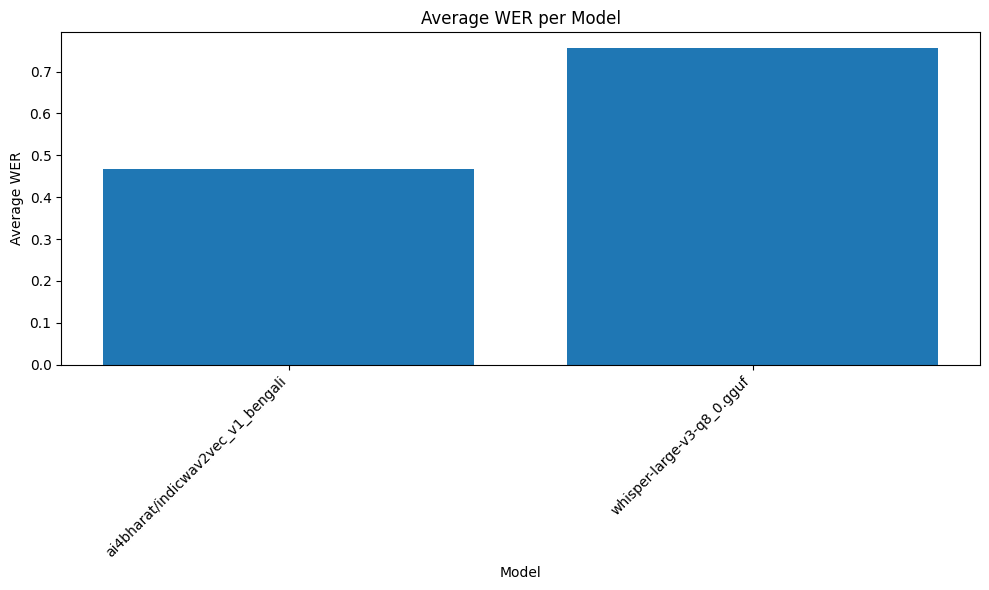

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average WER for each model
avg_wer_per_model = df_results.groupby('Model')['WER'].mean().reset_index()

# Create a bar chart of average WER per model using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(avg_wer_per_model['Model'], avg_wer_per_model['WER'])
plt.xlabel('Model')
plt.ylabel('Average WER')
plt.title('Average WER per Model')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

#### WER vs audio

/tmp/ipython-input-52-2769731599.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df_results['Model'].unique())) # Get a colormap


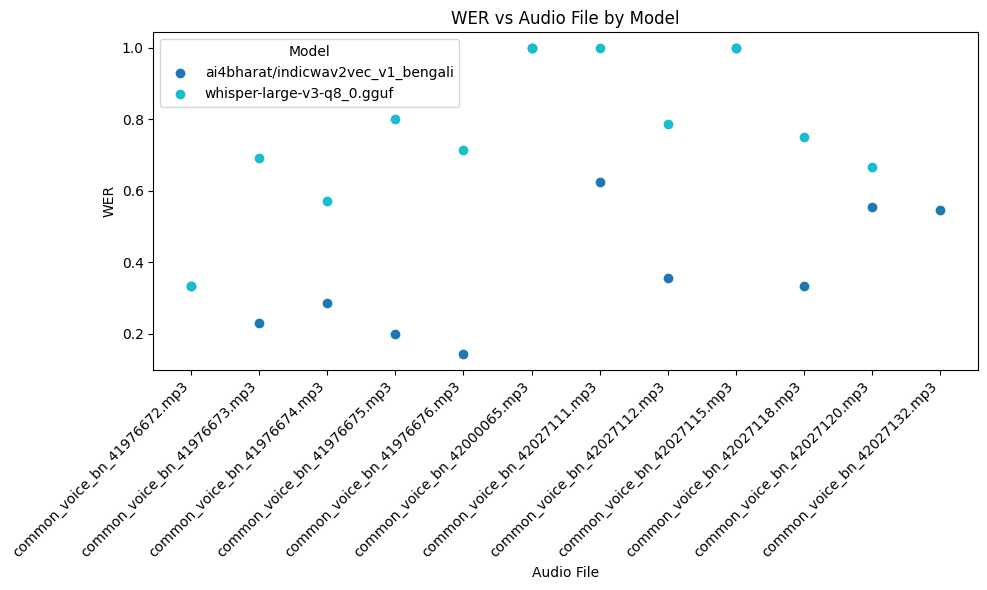

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a scatter plot of WER vs File, colored by Model using matplotlib
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(df_results['Model'].unique())) # Get a colormap
for i, model_name in enumerate(df_results['Model'].unique()):
    model_data = df_results[df_results['Model'] == model_name]
    plt.scatter(model_data['File'], model_data['WER'], color=colors(i), label=model_name)

plt.xlabel('Audio File')
plt.ylabel('WER')
plt.title('WER vs Audio File by Model')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Model')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

#### CER vs models

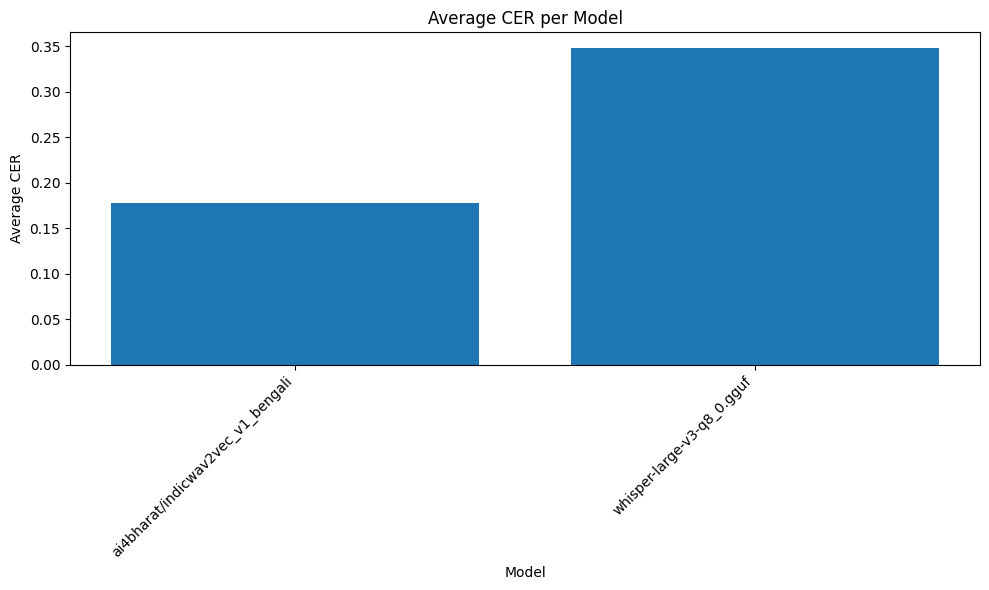

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average WER for each model
avg_wer_per_model = df_results.groupby('Model')['CER'].mean().reset_index()

# Create a bar chart of average WER per model using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(avg_wer_per_model['Model'], avg_wer_per_model['CER'])
plt.xlabel('Model')
plt.ylabel('Average CER')
plt.title('Average CER per Model')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

#### CER vs audio

/tmp/ipython-input-54-88840806.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df_results['Model'].unique())) # Get a colormap


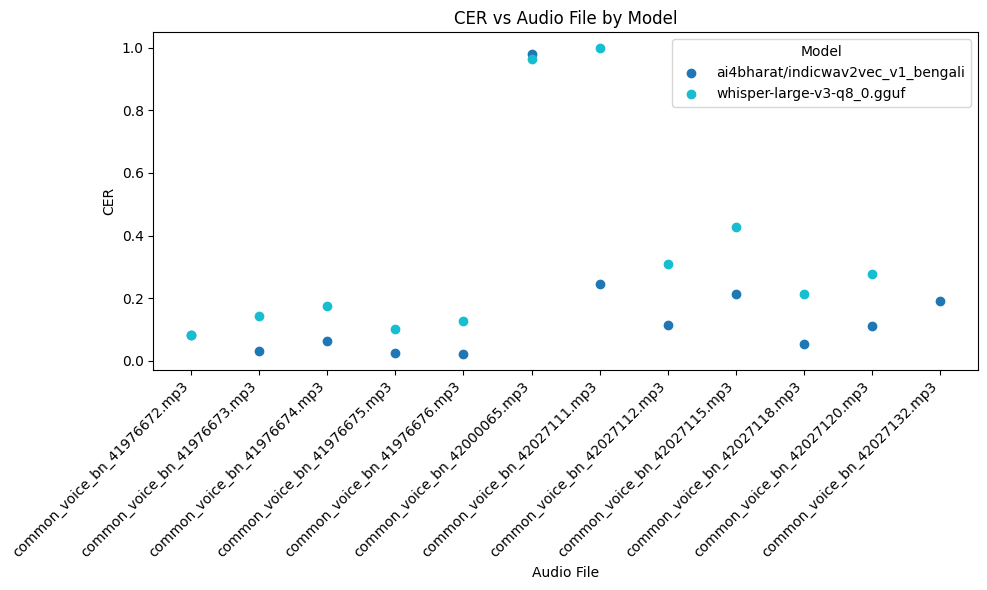

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a scatter plot of WER vs File, colored by Model using matplotlib
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(df_results['Model'].unique())) # Get a colormap
for i, model_name in enumerate(df_results['Model'].unique()):
    model_data = df_results[df_results['Model'] == model_name]
    plt.scatter(model_data['File'], model_data['CER'], color=colors(i), label=model_name)

plt.xlabel('Audio File')
plt.ylabel('CER')
plt.title('CER vs Audio File by Model')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Model')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Step 9: Download results

In [ ]:
df_results.to_csv("Model0.csv", index=False)
files.download("Model0.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect('ai4bharat.sql')

# Save the DataFrame to a SQL table
df_results.to_sql('results', conn, index=False, if_exists='replace')

# Close the connection
conn.close()

# Download the database file
files.download("ai4bharat.sql")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

___

### Authenticate with Hugging Face

If the model you are trying to load is private or gated, you will need to authenticate with your Hugging Face token.

You can do this by adding your token to Colab's secrets manager (under the "🔑" icon in the left panel) with the name `HF_TOKEN`, and then running the following code cell:

In [ ]:
from huggingface_hub import login
from google.colab import userdata

# Get the Hugging Face token from Colab's secrets manager
hf_token = userdata.get('HF_TOKEN')

# Log in to Hugging Face Hub
if hf_token:
    login(token=hf_token)
    print("Successfully logged in to Hugging Face Hub.")
else:
    print("Hugging Face token not found in Colab secrets. Please add it.")

Successfully logged in to Hugging Face Hub.


In [ ]:
# Access all elements in the 'path' column
all_paths = df['path']

# Print the first few elements to verify
print(all_paths.head())

In [ ]:
!git clone https://github.com/ggerganov/whisper.cpp



Cloning into 'whisper.cpp'...
remote: Enumerating objects: 21605, done.
remote: Counting objects: 100% (755/755), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 21605 (delta 569), reused 482 (delta 482), pack-reused 20850 (from 4)
Receiving objects: 100% (21605/21605), 25.27 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (15073/15073), done.


In [ ]:
%cd whisper.cpp

/content/whisper.cpp


In [ ]:
!make

cmake -B build 
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Git: /usr/bin/git (found version "2.34.1")
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing 

In [ ]:
!mkdir -p models

In [ ]:
%cd ..

/content


In [ ]:
!mv whisper-large-v3-q8_0.gguf whisper.cpp/models/

In [ ]:
%cd ..


/


In [ ]:
%cd content

/content
